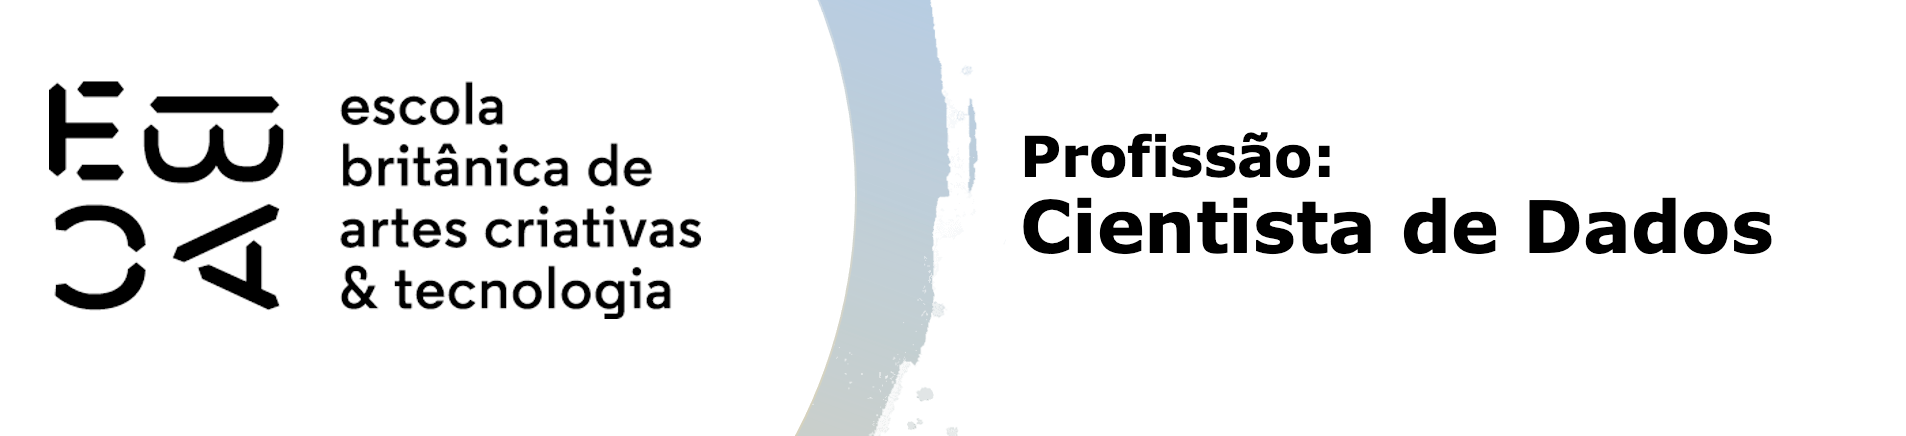

# **Tarefa** - Módulo 36 exercicio 1

## Exercicio

Carregue a base ```NFP.ftr```. Essa base é proveniente do projeto #AMABiliDados, e contém dados da nota fiscal paulista cadastrados para doação automática para a AMA, Associação de Amigos do Autista. 

A *Nota Fiscal Paulista* é um programa de incentivo do governo do estado de São Paulo, que retorna um pedacinho do ICMS ao consumidor sempre que solicita o registro do seu CPF na nota. Nesse programa, o contribuinte pode direcionar seus créditos a uma ONG, e quando faz isso, sempre que faz esse consumidor cadastrado faz uma compra, os créditos de notas emitidas pelo mesmo estabelecimento não identificadas (notas sem CPF) são "arrastados" para a ONG na forma de uma doação.

Clique no link, caso queira saber mais sobre a [AMA](https://www.ama.org.br/site/).<br>
Clique no link, caso queira saber como o cidadão pode ser um [doador da NFP](https://doacao1.ama.org.br/sitenfp).

Essa base possui dados das notas cujos contribuintes direcionaram seus créditos à AMA. Seus campos estão descritos abaixo:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

## Pacotes + Dataframe

In [7]:
import pandas  as pd
import numpy   as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [8]:
df = pd.read_pickle("base_nfp.pkl")
df

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187641,22.172.203/0004-40,B.BLEND MAQUINAS E BEBIDAS S. A.,180264,2021-01-07,252.84,2021-01-07,0.00,Liberado,2021,2,0.000000,0,não definido
187642,71.676.316/0005-70,SUPERMERCADOS MAMBO LTDA.,348953,2021-01-07,373.65,2021-01-07,0.00,Liberado,2021,2,0.000000,0,Mercado
187643,61.585.865/0240-93,RAIADROGASIL S/A,190447,2021-01-07,130.71,2021-01-07,0.00,Liberado,2021,2,0.000000,0,Farmácia
187644,67.616.128/0001-55,AYUMI SUPERMERCADOS LTDA - 1,51004,2021-01-07,43.16,2021-01-07,0.00,Liberado,2021,2,0.000000,0,Mercado


## Análise da probabilidade de retorno

Considere somente os dados de janeiro de 2020 em diante para esta análise.

- Analise a proporção de notas que tiveram retorno>0 por categoria de estabelecimento. Esta análise pode ser por tabela ou gráfico.

In [10]:
# Ajustes no Dataframe

df = df.reset_index()
df["Data Registo"] = pd.to_datetime(df['Data Registro'], errors="coerce")  
df = df.set_index("Data Registro")  

df = df[df.index.year >= 2020]
df[df['Retorno'] > 0]
df = df.reset_index()
df.head()

,Data Registro,index,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria,Data Registo
0,2020-08-01,64598,05.234.750/0001-41,TX BURGER LTDA,77882,2020-01-01,78.80,0.0,A Calcular,2019,2,0.0,0,não definido,2020-08-01
1,2020-01-01,64599,47.508.411/1476-88,CIA BRASILEIRA DE DISTRIBUICAO,20087,2020-01-01,22.71,0.0,A Calcular,2019,2,0.0,0,Mercado,2020-01-01
2,2020-08-01,64600,09.060.964/0108-39,PIMENTA VERDE ALIMENTOS LTDA,82366,2020-01-01,35.90,0.0,A Calcular,2019,2,0.0,0,Alimentos,2020-08-01
3,2020-08-01,64601,61.412.110/0307-39,DROGARIA SAO PAULO S A,234178,2020-01-01,21.77,0.0,A Calcular,2019,2,0.0,0,Farmácia,2020-08-01
4,2020-08-01,64602,46.952.032/0001-98,PANIFICADORA E CONFEITARIA QUELUZ LTDA,3305,2020-01-01,80.95,0.0,A Calcular,2019,2,0.0,0,Restaurantes,2020-08-01


## Cálculo do WOE

- Calcule o WOE das categorias, sendo que o evento em questão é a nota ter retorno>0.
- Analise este WOE por tabela e por gráfico.

In [12]:
# Constante
epsilon = 1e-6

# Contagem por categoria
grupo = df.groupby('categoria').agg(
    eventos=('flag_credito', 'sum'),   # quantidade de notas com crédito
    total=('flag_credito', 'count')    # quantidade total de notas
).reset_index()

grupo['nao_eventos'] = grupo['total'] - grupo['eventos']

# Totais gerais
total_eventos = grupo['eventos'].sum()
total_nao_eventos = grupo['nao_eventos'].sum()

# Calcular proporções com a constante
grupo['pct_eventos'] = (grupo['eventos'] + epsilon) / (total_eventos + epsilon)
grupo['pct_nao_eventos'] = (grupo['nao_eventos'] + epsilon) / (total_nao_eventos + epsilon)

# Calcular o WOE
grupo['WOE'] = np.log(grupo['pct_eventos'] / grupo['pct_nao_eventos'])

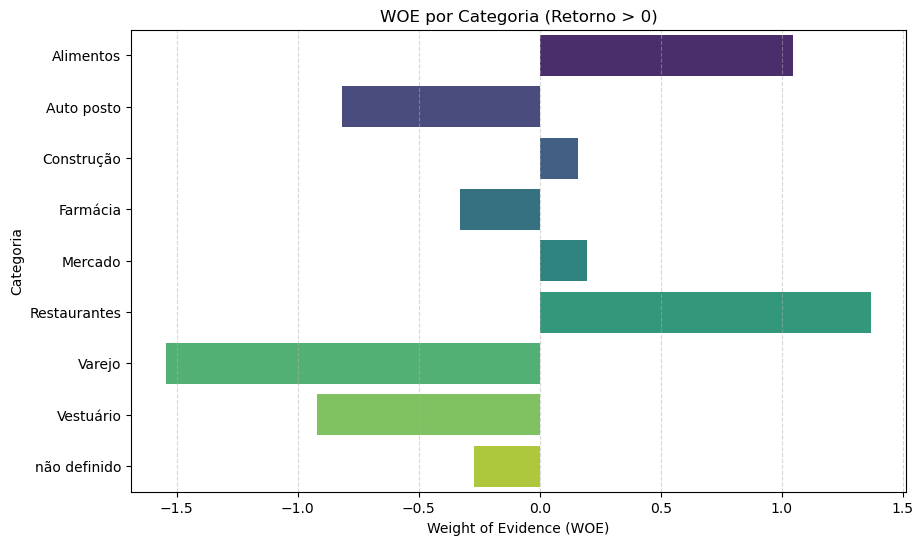



Tabela Woe:



,categoria,eventos,total,nao_eventos,pct_eventos,pct_nao_eventos,WOE
0,Alimentos,3452,5061,1609,0.092223,0.032387,1.046444
1,Auto posto,135,540,405,0.003607,0.008152,-0.815509
2,Construção,7537,16063,8526,0.201357,0.171618,0.159807
3,Farmácia,3590,10201,6611,0.095910,0.133072,-0.327480
4,Mercado,13196,27584,14388,0.352542,0.289614,0.196622
5,Restaurantes,1637,2190,553,0.043734,0.011131,1.368366
6,Varejo,704,5072,4368,0.018808,0.087923,-1.542179
7,Vestuário,443,1920,1477,0.011835,0.029730,-0.921095
8,não definido,6737,18480,11743,0.179985,0.236373,-0.272539


In [13]:
plt.figure(figsize=(10,6))
sns.barplot(data=grupo, x='WOE', y='categoria', palette='viridis')
plt.title('WOE por Categoria (Retorno > 0)')
plt.xlabel('Weight of Evidence (WOE)')
plt.ylabel('Categoria')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()

print("\n\nTabela Woe:\n")
grupo

## Cálculo do *Information Value*

Calcule o *IV* dessa variável.

In [15]:
# Calcular o IV por categoria
grupo['IV_categoria'] = (grupo['pct_eventos'] - grupo['pct_nao_eventos']) * grupo['WOE']

# IV total
IV_total = grupo['IV_categoria'].sum()

print(f"Information Value total: {IV_total:.4f}b")

Information Value total: 0.2787b


* **Information value** de <span style="color:cyan">0.278</span> demonstra um valor preditivo moderado.
* Iremos então conferir o **Information Value** ao longo dos mêses

### Information Value ao longo dos mêses

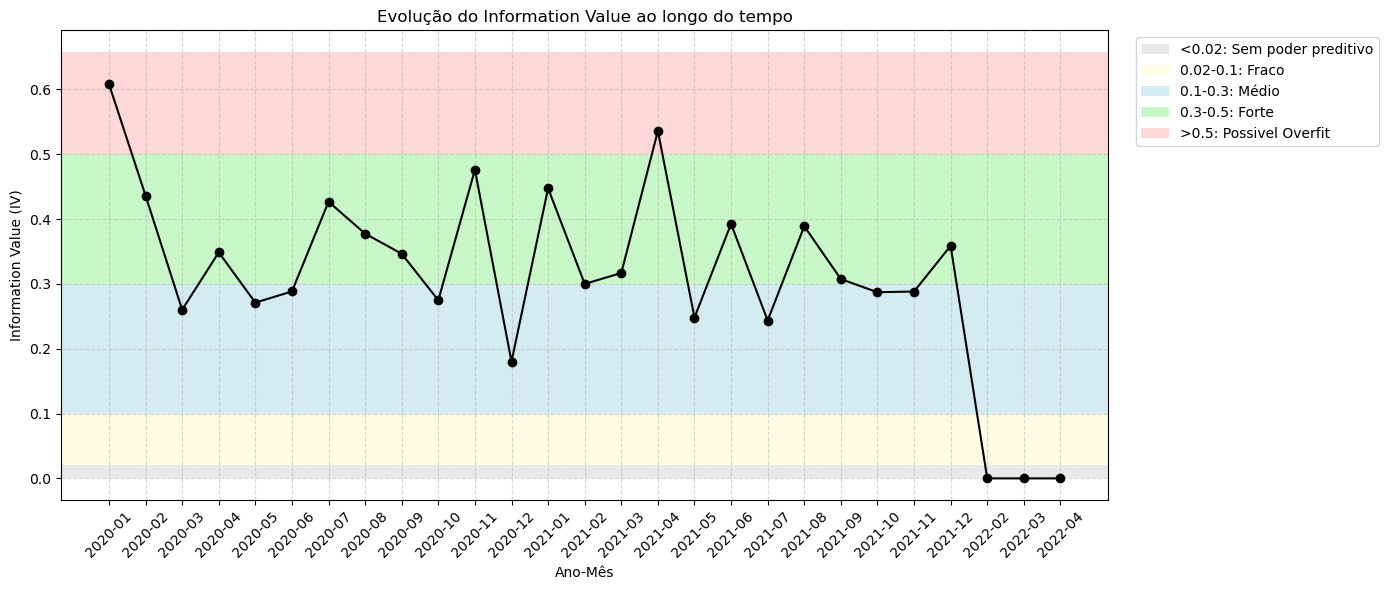

In [18]:
# Agrupando por mês
df['ano_mes'] = df['Data Registro'].dt.to_period('M')

# Função: IV por Mês
def calcular_iv_periodo(df_periodo):
    grupo = df_periodo.groupby('categoria').agg(
        eventos=('flag_credito', 'sum'),
        total=('flag_credito', 'count')
    ).reset_index()
    grupo['nao_eventos'] = grupo['total'] - grupo['eventos']

    total_eventos = grupo['eventos'].sum()
    total_nao_eventos = grupo['nao_eventos'].sum()

    grupo['pct_eventos'] = (grupo['eventos'] + epsilon) / (total_eventos + epsilon)
    grupo['pct_nao_eventos'] = (grupo['nao_eventos'] + epsilon) / (total_nao_eventos + epsilon)
    grupo['WOE'] = np.log(grupo['pct_eventos'] / grupo['pct_nao_eventos'])
    grupo['IV_categoria'] = (grupo['pct_eventos'] - grupo['pct_nao_eventos']) * grupo['WOE']
    
    return grupo['IV_categoria'].sum()

# Utilizando a função
iv_temporal = df.groupby('ano_mes').apply(calcular_iv_periodo).reset_index()
iv_temporal.columns = ['ano_mes', 'IV']



    # Gráfico

# Plotando com o fundo colorido
fig, ax = plt.subplots(figsize=(14, 6))

# Background colorido
ax.axhspan(0, 0.02, facecolor='#d3d3d3', alpha=0.5, label='<0.02: Sem poder preditivo')
ax.axhspan(0.02, 0.1, facecolor='#fffac8', alpha=0.5, label='0.02-0.1: Fraco')
ax.axhspan(0.1, 0.3, facecolor='#add8e6', alpha=0.5, label='0.1-0.3: Médio')
ax.axhspan(0.3, 0.5, facecolor='#90ee90', alpha=0.5, label='0.3-0.5: Forte')
ax.axhspan(0.5, iv_temporal['IV'].max() + 0.05, facecolor='#ffb3b3', alpha=0.5, label='>0.5: Possivel Overfit')

# Plot da linha
ax.plot(iv_temporal['ano_mes'].astype(str), iv_temporal['IV'], marker='o', color='black')
ax.set_title('Evolução do Information Value ao longo do tempo')
ax.set_xlabel('Ano-Mês')
ax.set_ylabel('Information Value (IV)')
ax.grid(True, linestyle='--', alpha=0.5)

# Correção do eixo x
ax.xaxis.set_major_locator(ticker.FixedLocator(range(len(iv_temporal))))
ax.set_xticklabels(iv_temporal['ano_mes'].astype(str), rotation=45)

# Ajustando a legenda
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper left', bbox_to_anchor=(1.02, 1))

plt.tight_layout()
plt.show()

* Contudo existem algumas informações importantes:
    * Em 2 momentos é notavel um possivel overfit
        * <span style="color:red">Janeiro 2020</span> e <span style="color:red">Abril de 2021</span>
    * Os ultimos 3 meses apresentam algum problema, pois estão sem valor preditivo algum.
    * Grande parte dos dados possuem um valor preditivo <span style="color:LawnGreen">Forte</span> ou <span style="color:cyan">Médio</span>

* Possivelmente o ultimo periodo esta com falta de dados, ou possuiu algum problema externo. mais dados ou informações seriam necessarios para explicar o comportamento irregular